In [199]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

import tensorflow

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense


import pickle

## Explore and understand data

Import data and see what the data looks like.


In [200]:
data = pd.read_csv('Training.csv')
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [201]:
data.shape

(4920, 134)

In [202]:
data.nunique()

itching                  2
skin_rash                2
nodal_skin_eruptions     2
continuous_sneezing      2
shivering                2
                        ..
blister                  2
red_sore_around_nose     2
yellow_crust_ooze        2
prognosis               41
Unnamed: 133             0
Length: 134, dtype: int64

In [203]:
data.drop("Unnamed: 133", axis = 1)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [204]:
# all diseases

sorted(data.prognosis.unique())

['(vertigo) Paroymsal  Positional Vertigo',
 'AIDS',
 'Acne',
 'Alcoholic hepatitis',
 'Allergy',
 'Arthritis',
 'Bronchial Asthma',
 'Cervical spondylosis',
 'Chicken pox',
 'Chronic cholestasis',
 'Common Cold',
 'Dengue',
 'Diabetes ',
 'Dimorphic hemmorhoids(piles)',
 'Drug Reaction',
 'Fungal infection',
 'GERD',
 'Gastroenteritis',
 'Heart attack',
 'Hepatitis B',
 'Hepatitis C',
 'Hepatitis D',
 'Hepatitis E',
 'Hypertension ',
 'Hyperthyroidism',
 'Hypoglycemia',
 'Hypothyroidism',
 'Impetigo',
 'Jaundice',
 'Malaria',
 'Migraine',
 'Osteoarthristis',
 'Paralysis (brain hemorrhage)',
 'Peptic ulcer diseae',
 'Pneumonia',
 'Psoriasis',
 'Tuberculosis',
 'Typhoid',
 'Urinary tract infection',
 'Varicose veins',
 'hepatitis A']

In [205]:
# list of all symptoms
columns = list(data.columns)
columns[:-1]

['itching',
 'skin_rash',
 'nodal_skin_eruptions',
 'continuous_sneezing',
 'shivering',
 'chills',
 'joint_pain',
 'stomach_pain',
 'acidity',
 'ulcers_on_tongue',
 'muscle_wasting',
 'vomiting',
 'burning_micturition',
 'spotting_ urination',
 'fatigue',
 'weight_gain',
 'anxiety',
 'cold_hands_and_feets',
 'mood_swings',
 'weight_loss',
 'restlessness',
 'lethargy',
 'patches_in_throat',
 'irregular_sugar_level',
 'cough',
 'high_fever',
 'sunken_eyes',
 'breathlessness',
 'sweating',
 'dehydration',
 'indigestion',
 'headache',
 'yellowish_skin',
 'dark_urine',
 'nausea',
 'loss_of_appetite',
 'pain_behind_the_eyes',
 'back_pain',
 'constipation',
 'abdominal_pain',
 'diarrhoea',
 'mild_fever',
 'yellow_urine',
 'yellowing_of_eyes',
 'acute_liver_failure',
 'fluid_overload',
 'swelling_of_stomach',
 'swelled_lymph_nodes',
 'malaise',
 'blurred_and_distorted_vision',
 'phlegm',
 'throat_irritation',
 'redness_of_eyes',
 'sinus_pressure',
 'runny_nose',
 'congestion',
 'chest_pain',


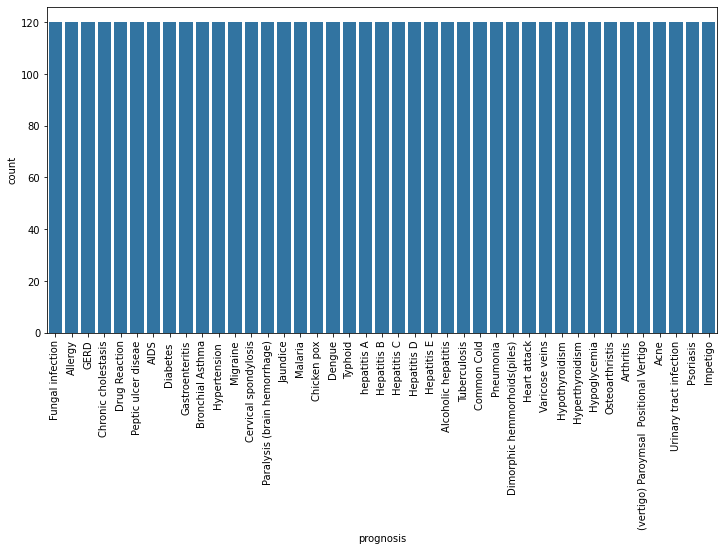

In [206]:
plt.figure(figsize=(12, 6))
base_color = sns.color_palette()[0]
sns.countplot(data=data, x='prognosis', color=base_color)
plt.xticks(rotation=90);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


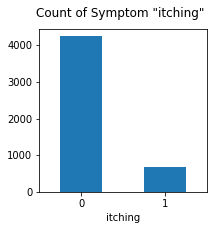

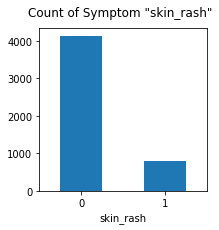

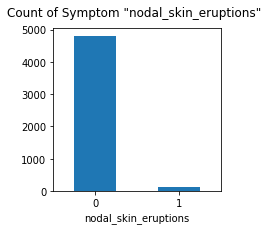

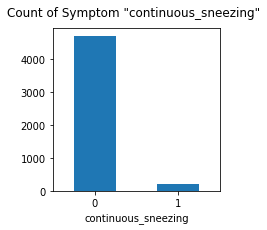

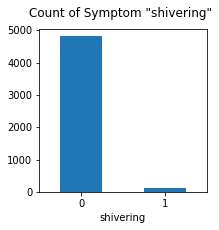

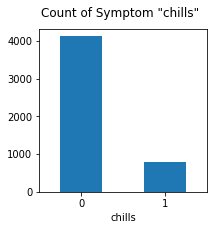

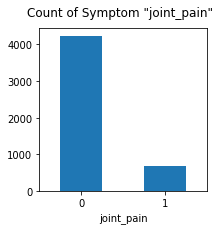

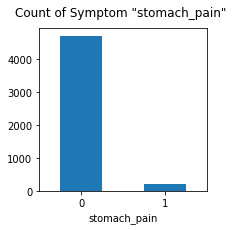

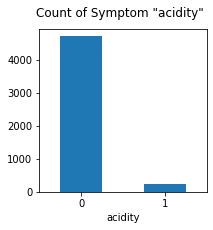

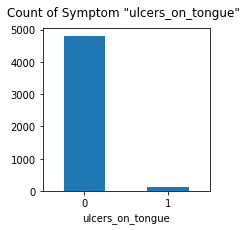

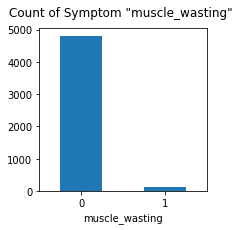

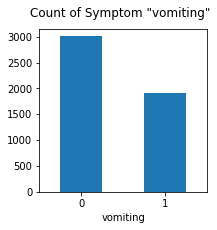

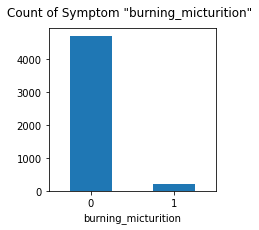

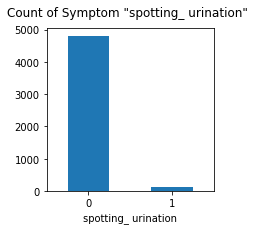

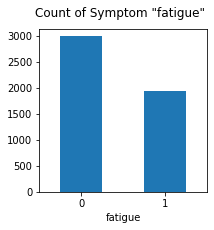

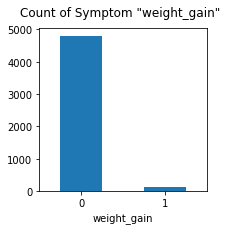

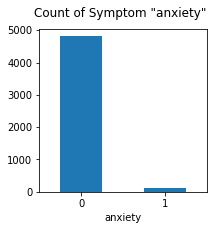

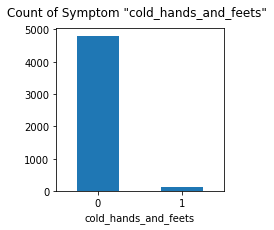

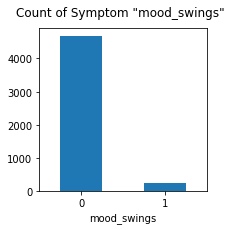

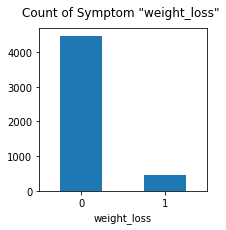

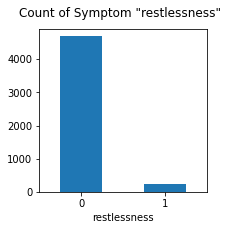

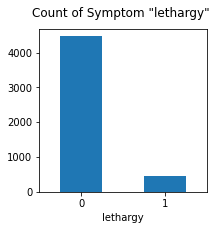

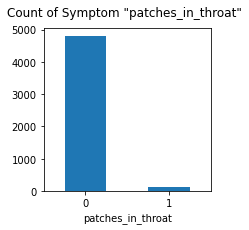

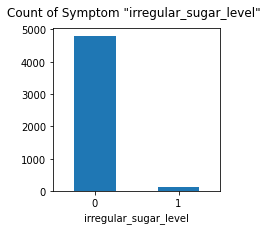

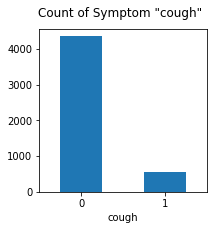

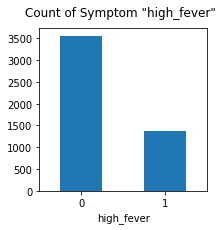

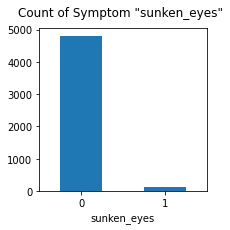

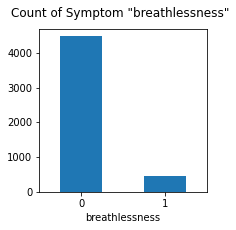

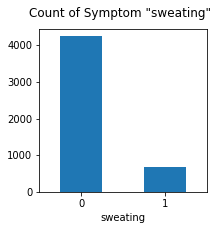

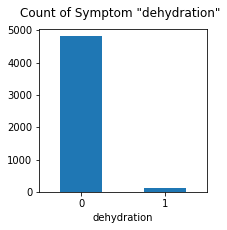

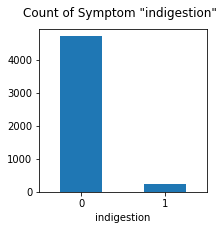

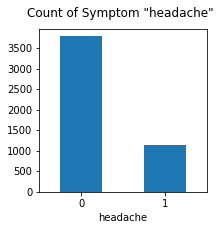

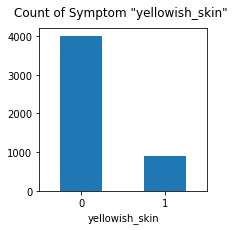

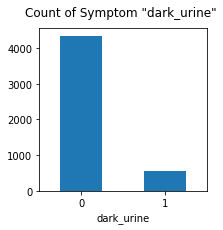

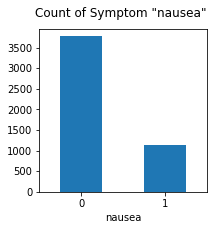

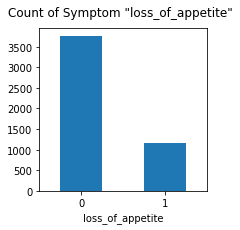

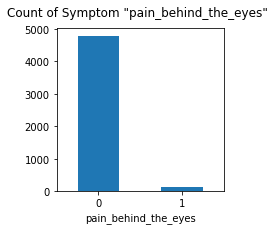

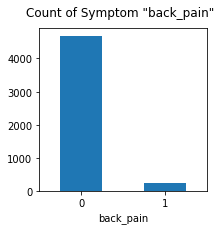

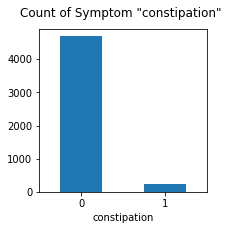

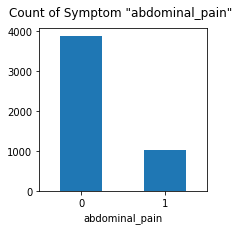

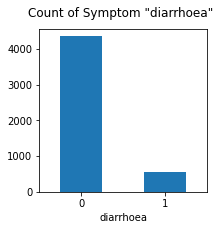

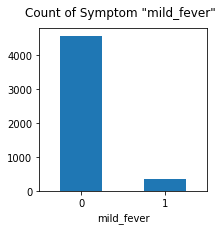

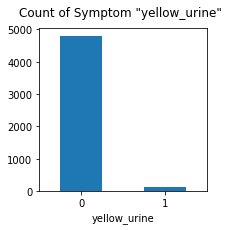

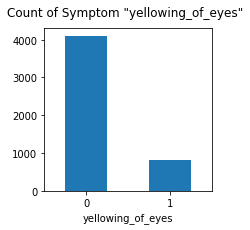

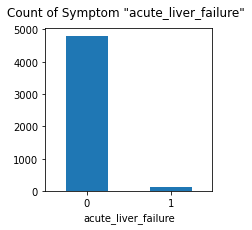

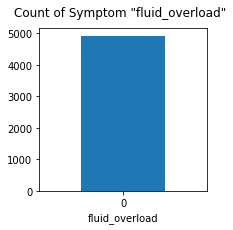

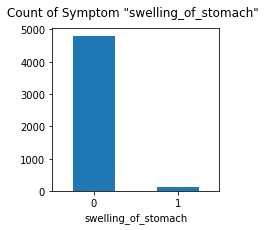

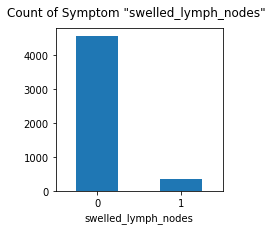

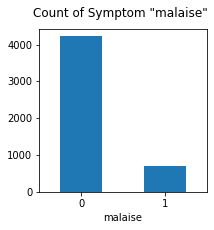

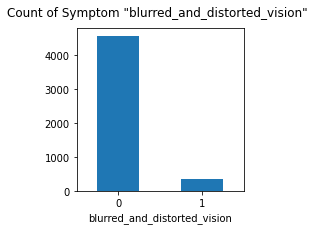

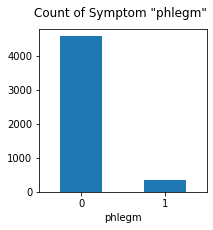

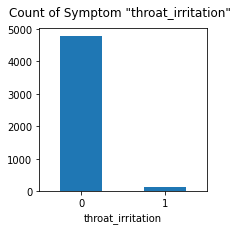

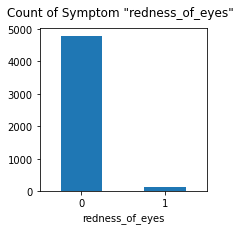

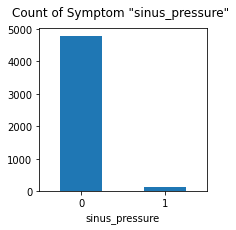

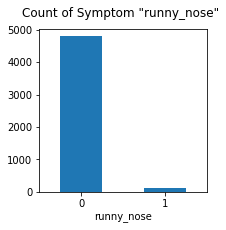

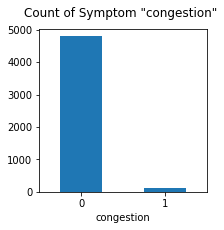

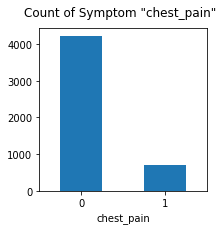

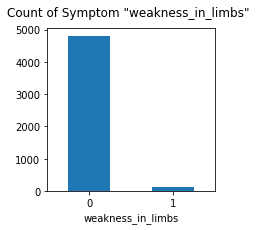

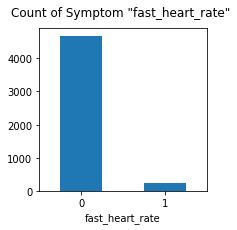

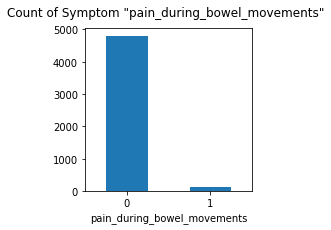

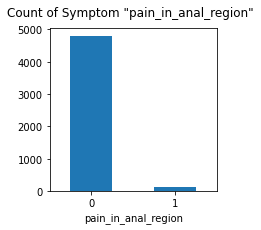

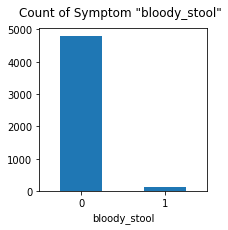

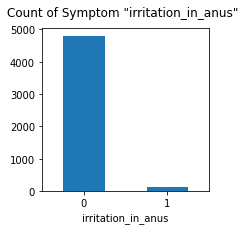

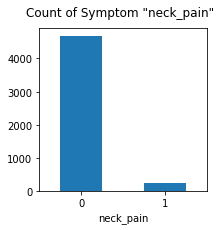

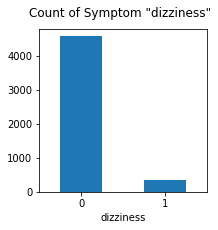

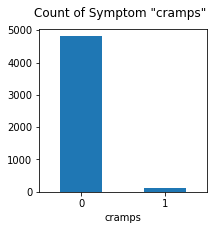

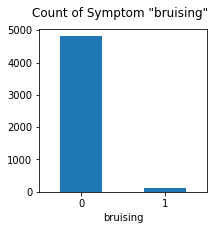

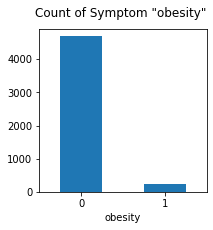

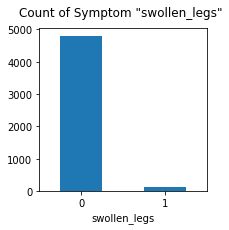

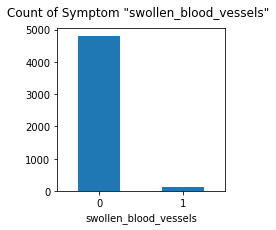

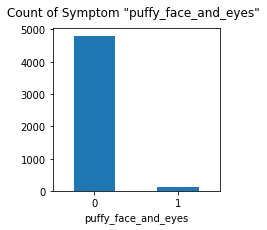

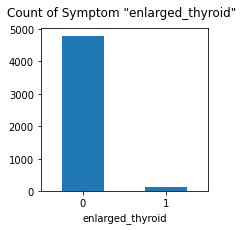

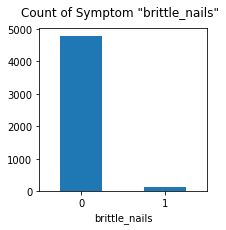

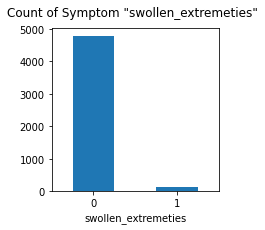

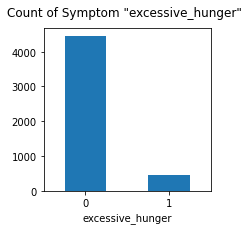

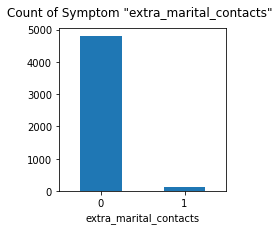

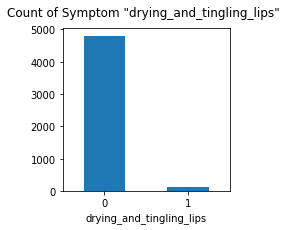

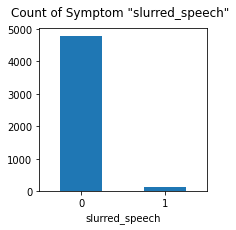

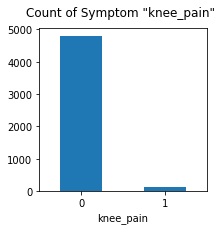

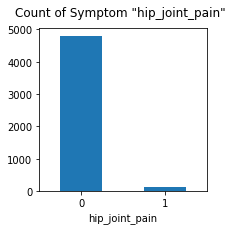

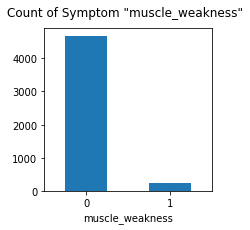

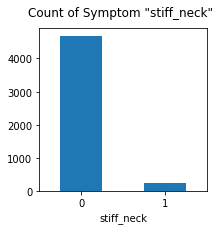

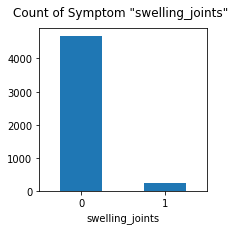

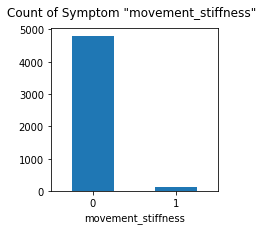

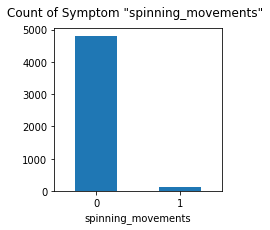

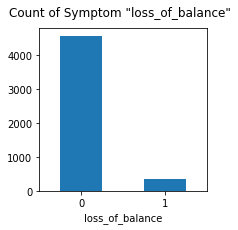

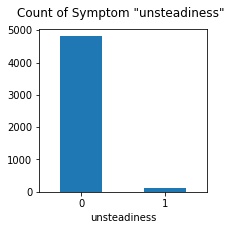

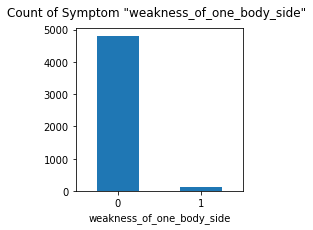

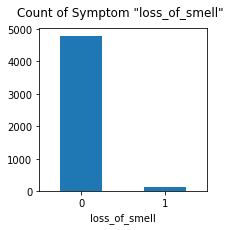

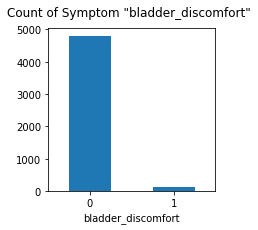

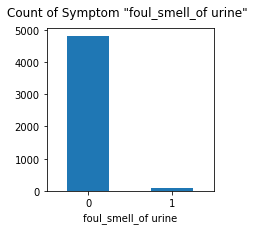

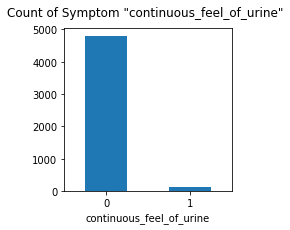

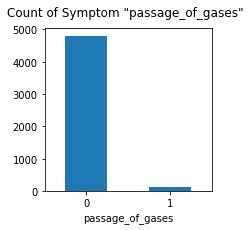

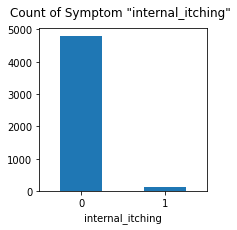

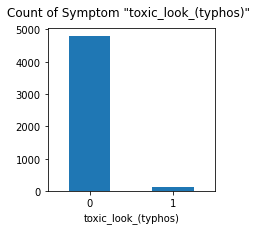

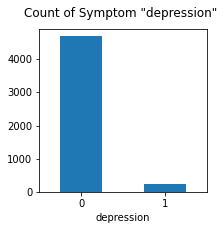

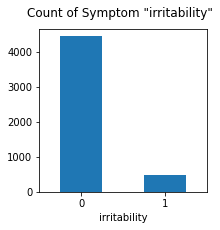

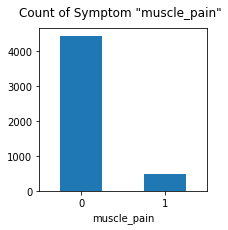

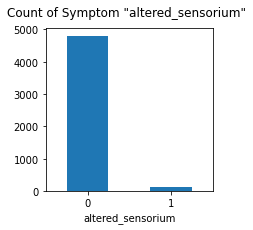

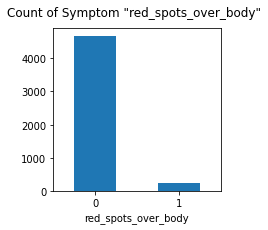

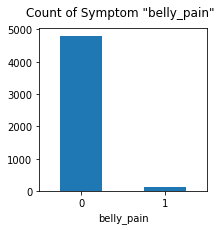

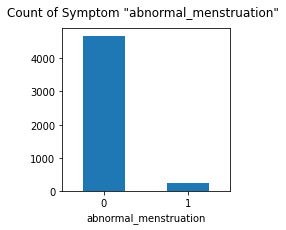

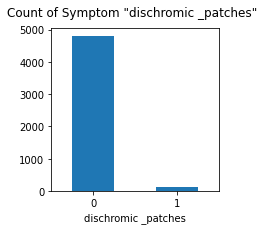

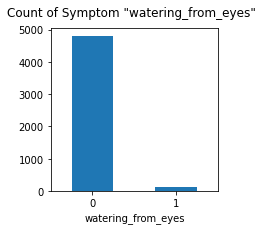

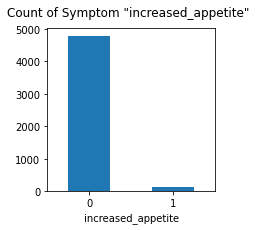

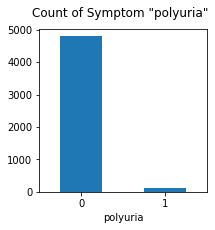

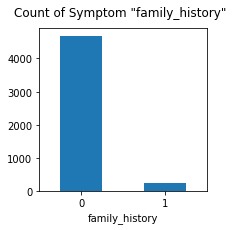

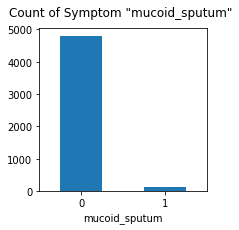

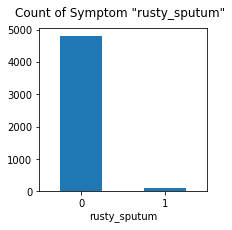

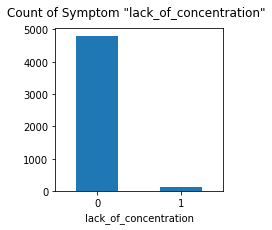

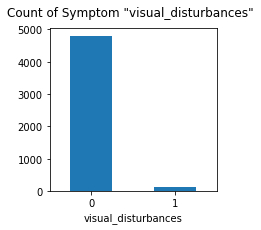

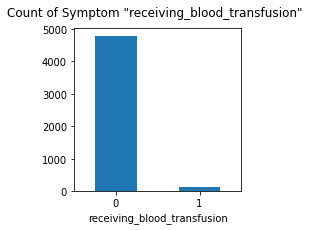

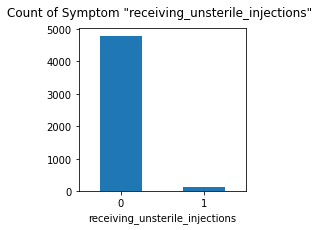

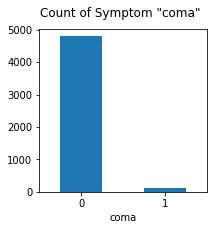

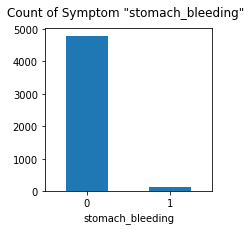

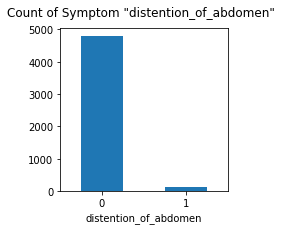

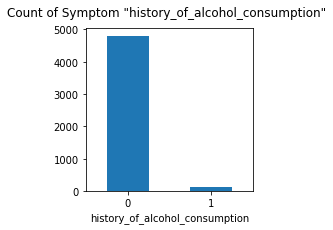

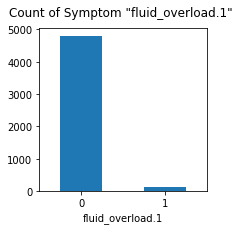

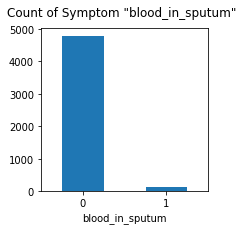

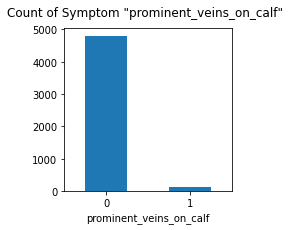

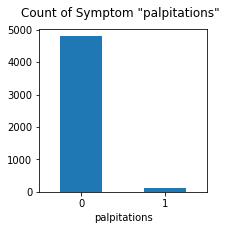

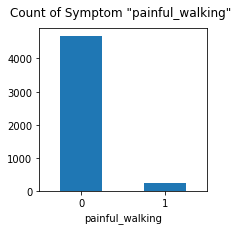

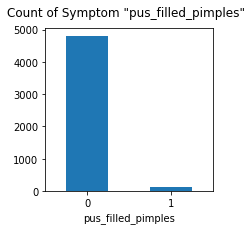

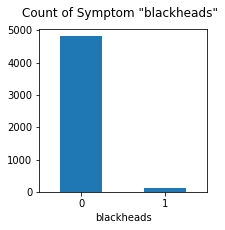

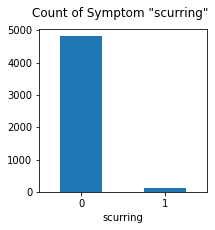

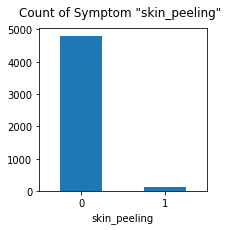

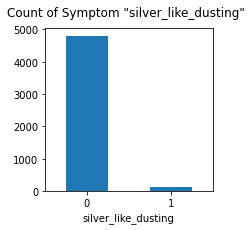

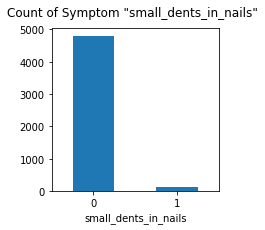

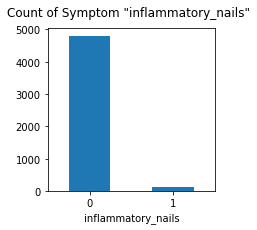

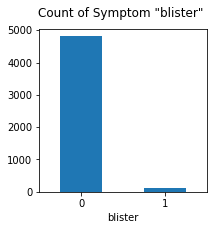

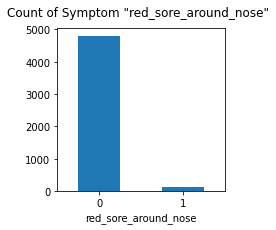

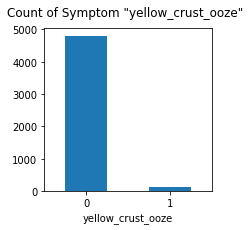

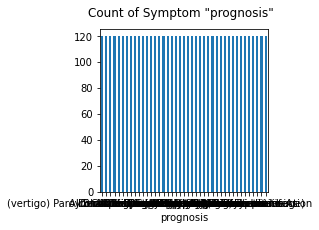

In [207]:
columns = list(data.columns[:-1])
# barplot of the count for all symptoms

for i in columns :
    fig, ax = plt.subplots(figsize=(3,3))
    bar = data.groupby(i).size().plot(kind='bar', ax=ax)
    plt.xticks(rotation=0)
    fig.suptitle("Count of Symptom \"" + i + "\"")


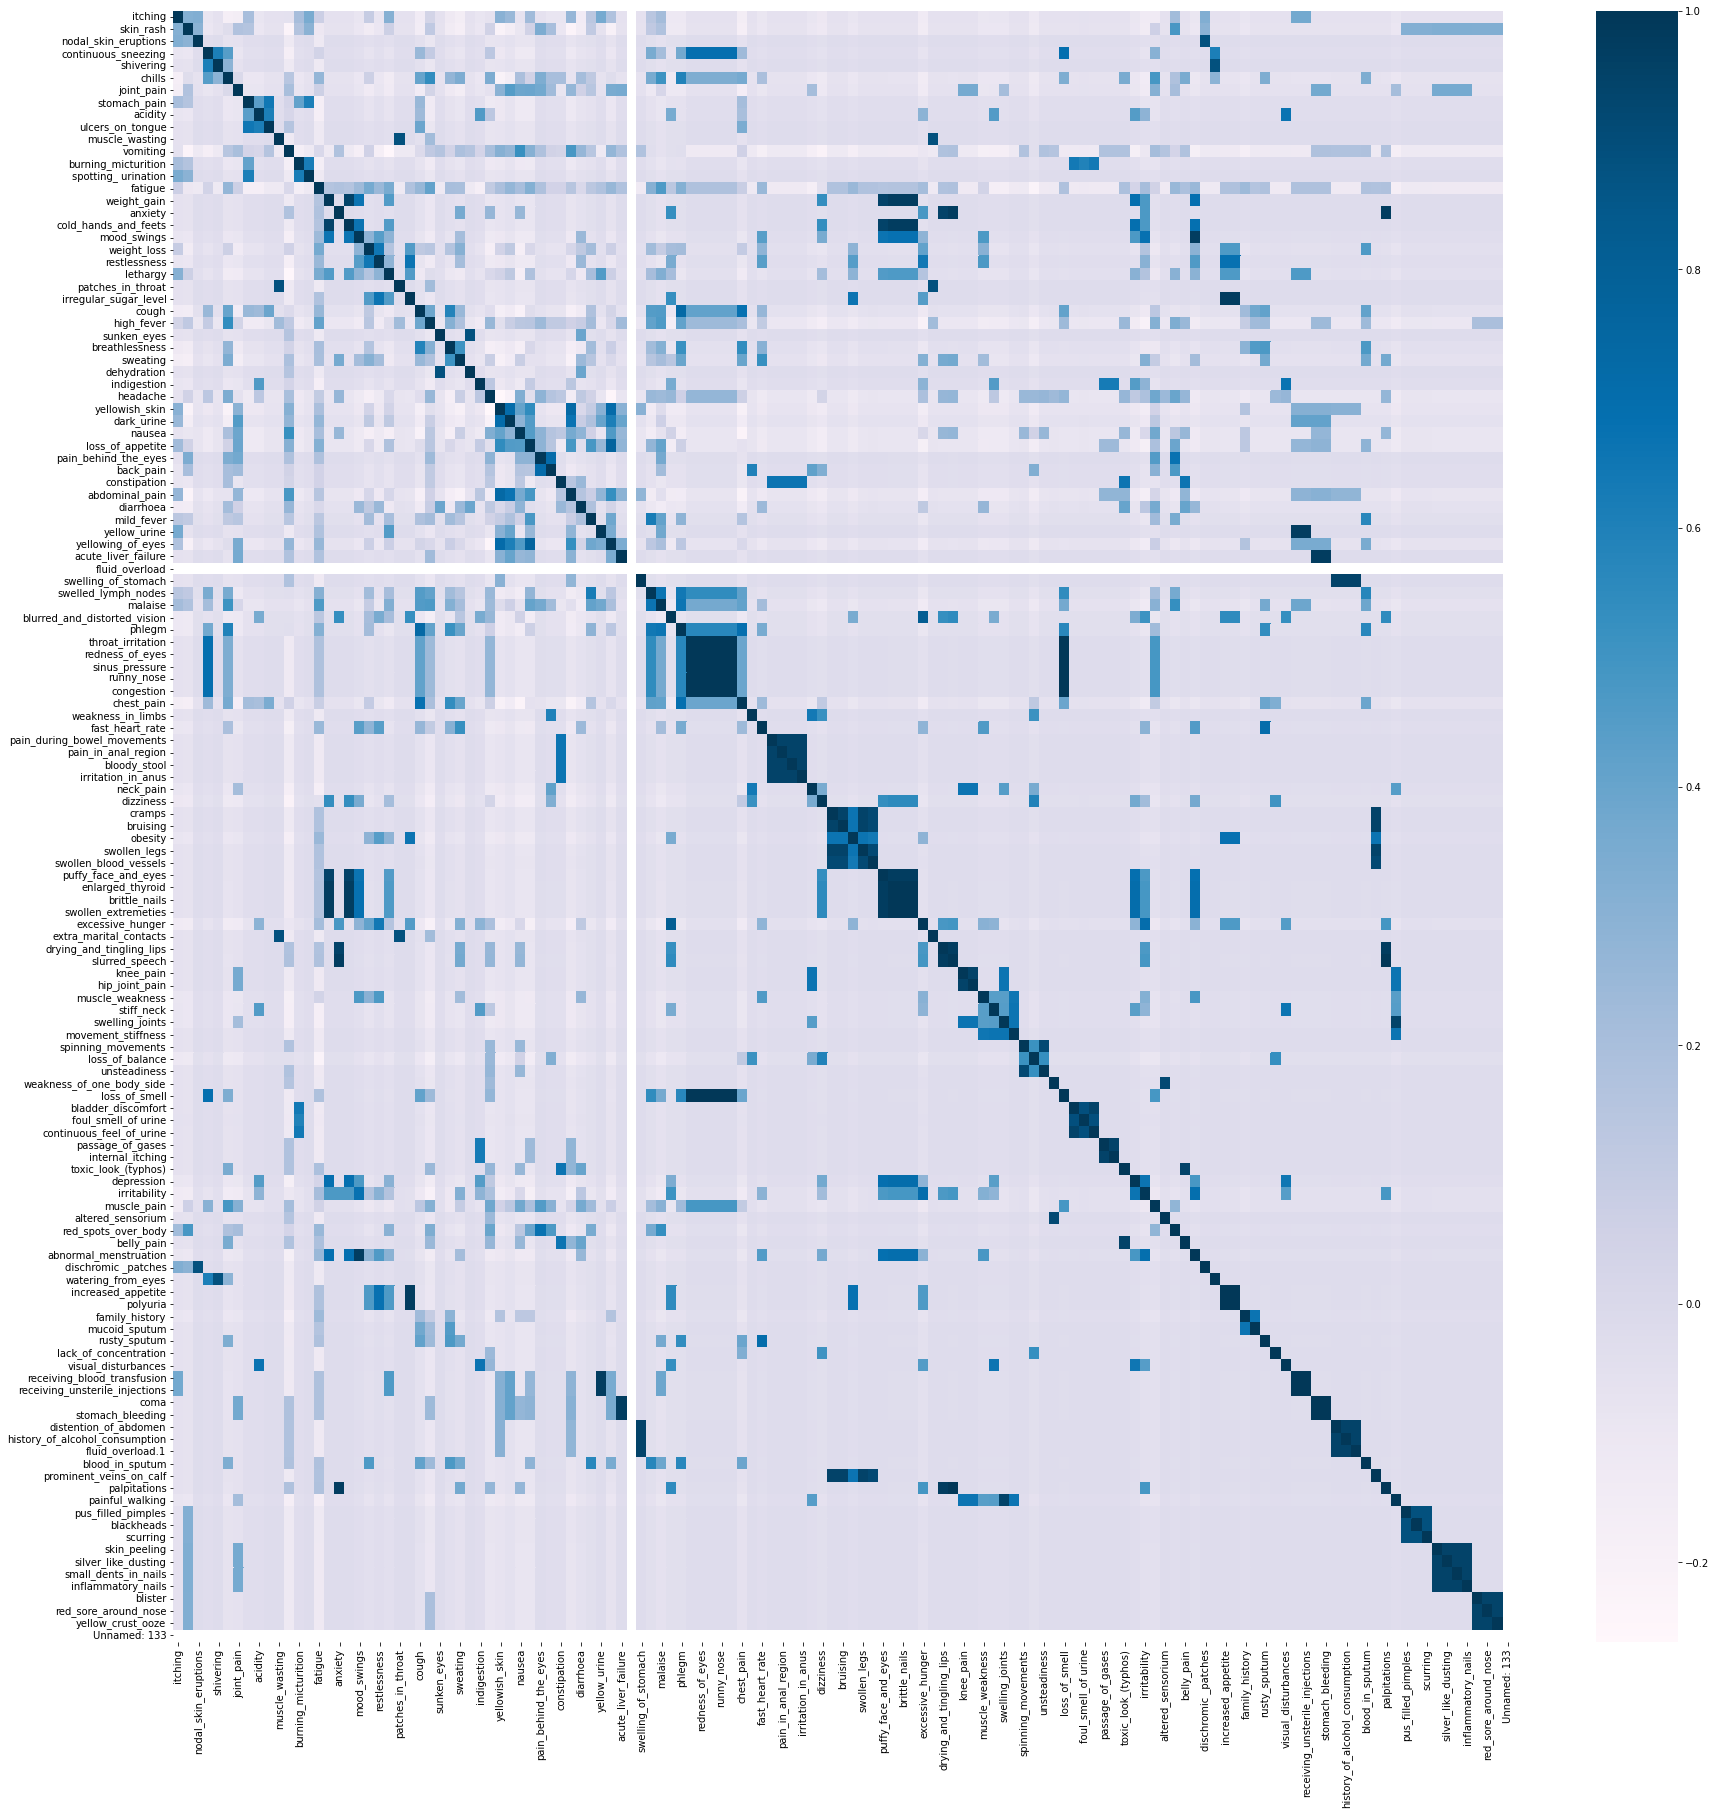

In [208]:
# compare linear relationships correlation heatmap (correlation coeficient)
plt.figure(figsize = (30,30))
sns.heatmap(data[0:-1].corr(), cmap = 'PuBu', annot = False)
plt.show()

In [209]:
data.describe()


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Unnamed: 133
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,0.0
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,NaN
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN


In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [211]:
#Function to find and drop null columns from the dataset

def drop_null_values(data):
    null_col = [col for col in data.columns if data[col].isnull().any()]
    data.drop(null_col, axis=1, inplace=True)
    return data
drop_null_values(data)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [212]:
data.dtypes

itching                  int64
skin_rash                int64
nodal_skin_eruptions     int64
continuous_sneezing      int64
shivering                int64
                         ...  
inflammatory_nails       int64
blister                  int64
red_sore_around_nose     int64
yellow_crust_ooze        int64
prognosis               object
Length: 133, dtype: object

In [213]:
data = data.astype('category')

In [214]:
data.dtypes

itching                 category
skin_rash               category
nodal_skin_eruptions    category
continuous_sneezing     category
shivering               category
                          ...   
inflammatory_nails      category
blister                 category
red_sore_around_nose    category
yellow_crust_ooze       category
prognosis               category
Length: 133, dtype: object

## Distribute data into training data and validation data


In [215]:
X = data.drop('prognosis', axis=1)
y = data['prognosis']
X.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [216]:
y.head()

0    Fungal infection
1    Fungal infection
2    Fungal infection
3    Fungal infection
4    Fungal infection
Name: prognosis, dtype: category
Categories (41, object): ['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne', 'Alcoholic hepatitis', ..., 'Typhoid',
                          'Urinary tract infection', 'Varicose veins', 'hepatitis A']

In [217]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=42)

## Initialize classifier, train classifier and check their accuracy

In [198]:
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
gaussian_nb = GaussianNB()
categorical_nb = CategoricalNB()
rf = RandomForestClassifier()
adaboost = AdaBoostClassifier()
bagging = BaggingClassifier()
gradient_boosting = GradientBoostingClassifier()

classifiers = [dt, knn, gaussian_nb, categorical_nb, rf, adaboost, bagging, gradient_boosting]

def train_and_test():
    result = {}
    for clf in classifiers:
        clf.fit(X_train, y_train)
        pred = clf.predict(X_val)
        score = accuracy_score(y_val, pred)
        result[clf.__class__.__name__] = score
    return result

result = train_and_test()

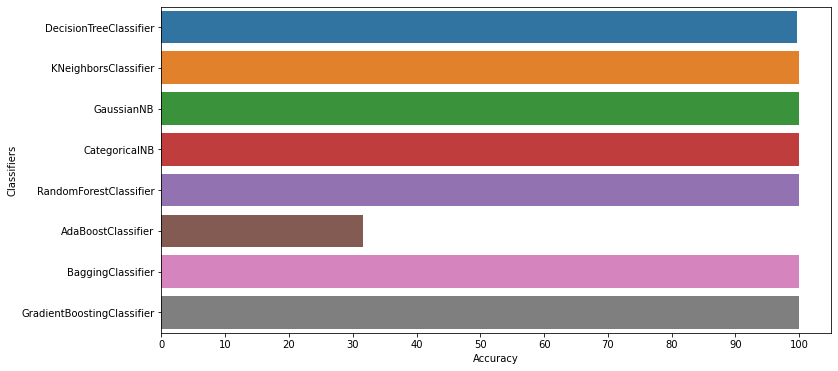

In [218]:
def plot_clf(result):
    plt.figure(figsize=(12,6))
    size = np.arange(0, 100+10, 10)
    sb.barplot(x = [v * 100 for v in result.values()] , y=[k for k in result.keys()])
    plt.xticks(size)
    plt.xlabel('Accuracy')
    plt.ylabel('Classifiers');
plot_clf(result)

## Test classfiers on Testing Data


In [219]:
test_data = pd.read_csv('Testing.csv')
test_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [220]:

test_X = test_data.drop('prognosis', axis=1)
test_y = test_data['prognosis']

def clf_report(clf):
    pred = clf.predict(test_X)
    score = classification_report(test_y, pred)
    return score

In [221]:
print(clf_report(categorical_nb))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
                           


Most of the classifiers gives 100% result 



## Neural Network

In [222]:
train_X = data.drop('prognosis', axis=1)
test_X = test_data.drop('prognosis', axis=1)


train_y = data['prognosis']
test_y = test_data['prognosis']

y_train_enc= pd.get_dummies(train_y)

y_test_enc= pd.get_dummies(test_y)


In [223]:
train_X.shape

(4920, 132)

In [224]:
y_train_enc.shape, y_test_enc.shape

((4920, 41), (42, 41))

In [225]:
# model

model= Sequential()
model.add(Dense(64, activation='relu', input_shape= (train_X.shape[1], )))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(y_train_enc.shape[1], activation='softmax'))



In [226]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                8512      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 16)                528       
                                                                 
 dense_15 (Dense)            (None, 41)                697       
                                                                 
Total params: 11,817
Trainable params: 11,817
Non-trainable params: 0
_________________________________________________________________


In [227]:
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping_monitor= EarlyStopping(patience=2, monitor='val_accuracy')
model.fit(train_X, y_train_enc, batch_size=120, epochs=30, validation_split=0.3, callbacks=[early_stopping_monitor])

Epoch 1/30
29/29 [==============================] - 1s 11ms/step - loss: 3.5676 - accuracy: 0.1008 - val_loss: 3.3571 - val_accuracy: 0.1951
Epoch 2/30
29/29 [==============================] - 0s 4ms/step - loss: 3.1219 - accuracy: 0.2123 - val_loss: 2.6752 - val_accuracy: 0.3171
Epoch 3/30
29/29 [==============================] - 0s 5ms/step - loss: 2.3270 - accuracy: 0.4660 - val_loss: 1.7062 - val_accuracy: 0.7317
Epoch 4/30
29/29 [==============================] - 0s 4ms/step - loss: 1.3661 - accuracy: 0.8148 - val_loss: 0.7524 - val_accuracy: 0.9512
Epoch 5/30
29/29 [==============================] - 0s 4ms/step - loss: 0.5692 - accuracy: 0.9678 - val_loss: 0.2160 - val_accuracy: 1.0000
Epoch 6/30
29/29 [==============================] - 0s 4ms/step - loss: 0.1865 - accuracy: 0.9994 - val_loss: 0.0571 - val_accuracy: 1.0000
Epoch 7/30
29/29 [==============================] - 0s 4ms/step - loss: 0.0728 - accuracy: 1.0000 - val_loss: 0.0233 - val_accuracy: 1.0000


In [228]:
model.evaluate(test_X, y_test_enc, batch_size=1, steps=5)

5/5 [==============================] - 0s 3ms/step - loss: 0.0223 - accuracy: 1.0000


[0.02229898050427437, 1.0]

In [229]:
prd_ann = (model.predict(test_X) > 0.5).astype(int)
prd_ann[1]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [230]:
np.argmax(prd_ann[1])

4

In [231]:
test_X.iloc[1]

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     1
shivering               1
                       ..
small_dents_in_nails    0
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
Name: 1, Length: 132, dtype: int64

In [232]:
test_y[4]

'Drug Reaction'

## Save trained model

In [233]:
# KNNClassifier as our model

filename = '\content\knn.model'
pickle.dump(knn, open(filename, 'wb'))